In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)

In [4]:
X.shape

(1000, 2)

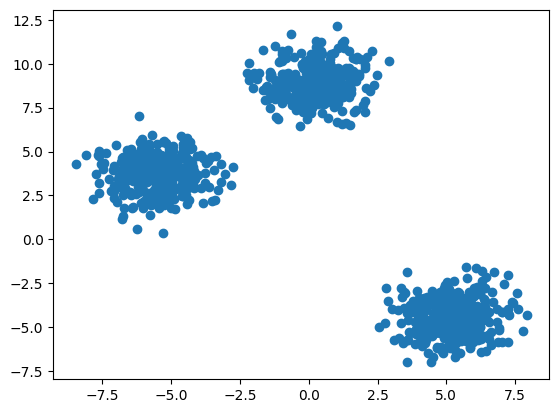

In [6]:
plt.scatter(X[:,0],X[:,1])

In [8]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [9]:
# elbow method
wcss=[];
for k in range(1,11):
  k_means=KMeans(n_clusters=k,random_state=23)
  k_means.fit(X_train)
  wcss.append(k_means.inertia_)

In [10]:
wcss

[35763.356599619714,
 8297.202114173544,
 1394.6687381999263,
 1246.7651366435896,
 1103.837401664384,
 927.8053447898778,
 827.3075118402832,
 719.400762325646,
 666.5944212161792,
 624.9664566943615]

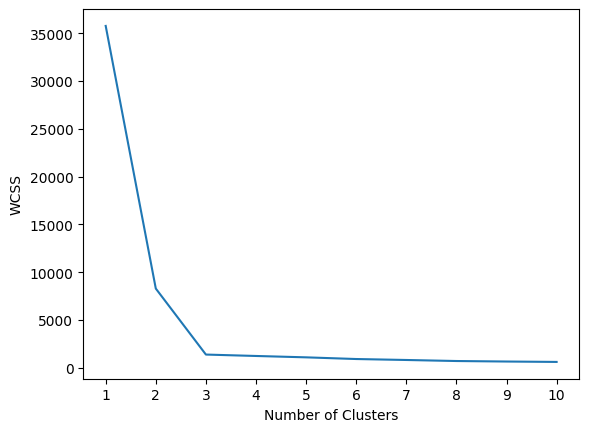

In [11]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
k_means=KMeans(n_clusters=3,random_state=23)
y_pred=k_means.fit_predict(X_train)

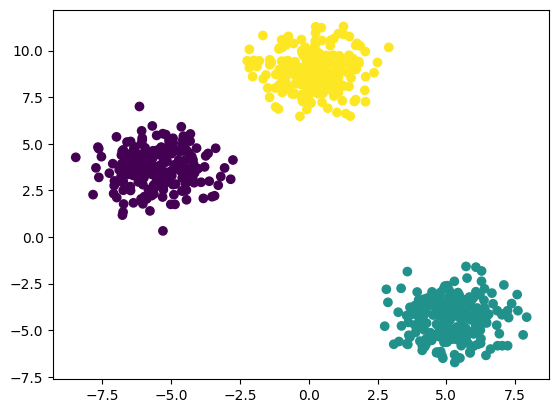

In [13]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_pred)

In [16]:
y_test_labels=k_means.predict(X_test)

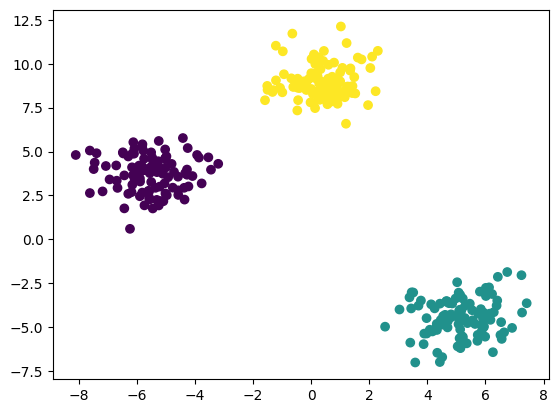

In [17]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

**This is the automative process for finding the value of k automatically using the library kneed
**

In [18]:
!pip install kneed

In [19]:
from kneed import KneeLocator

In [20]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(3)

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_coefficients=[]
for k in range(2,11):
  k_means=KMeans(n_clusters=k,random_state=23)
  k_means.fit(X_train)
  score=silhouette_score(X_train,k_means.labels_)
  silhouette_coefficients.append(score)

In [24]:
silhouette_coefficients

[np.float64(0.7252547694122655),
 np.float64(0.8027214370116031),
 np.float64(0.6446977328311203),
 np.float64(0.48697621157175297),
 np.float64(0.31942163536900325),
 np.float64(0.3228218874917031),
 np.float64(0.33644899867049693),
 np.float64(0.344189268442813),
 np.float64(0.3392159891575277)]

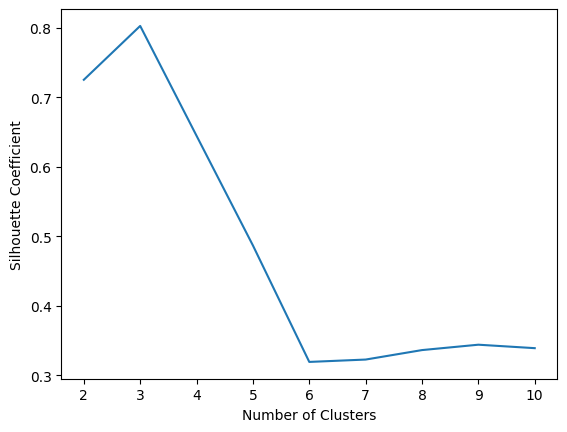

In [25]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()